In [1]:
!gdown 1AruX-tFqptgBbE0RBKXxrWB6UuwJwYIv

Downloading...
From: https://drive.google.com/uc?id=1AruX-tFqptgBbE0RBKXxrWB6UuwJwYIv
To: /content/HR_data.csv
100% 567k/567k [00:00<00:00, 67.1MB/s]


In [2]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 19.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=eb759b194859e143deafe35fc6c75c53200a4e27da6d448191756a6aa6ede651
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [3]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('/content/HR_data.csv')

In [5]:
dataset.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

  salary scale  
0          low  
1       medium  
2       medium  
3          low  
4          low

In [6]:
dataset.shape

(14999, 10)

In [7]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary scale'],
      dtype='object')

In [8]:
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary scale             0
dtype: int64

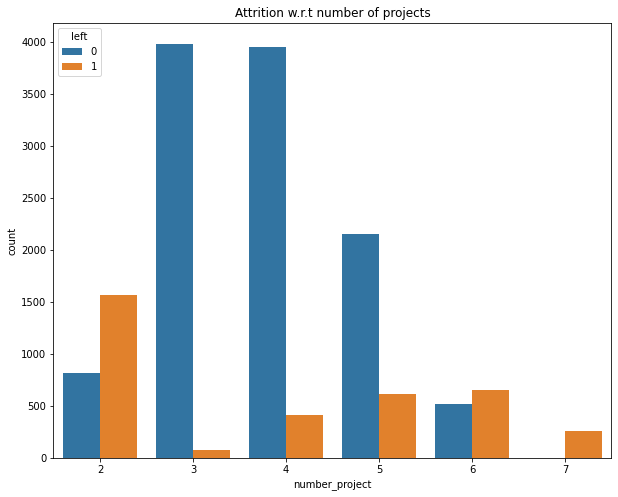

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset, x='number_project', hue='left').set_title('Attrition w.r.t number of projects');

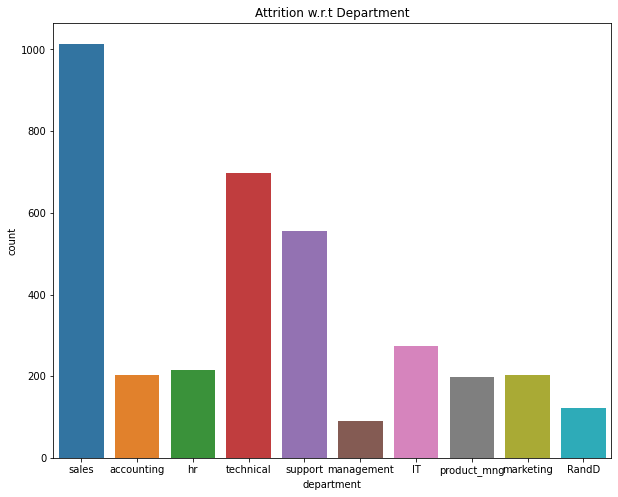

In [10]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=dataset[(dataset['left'] == 1)], x='department').set_title('Attrition w.r.t Department');

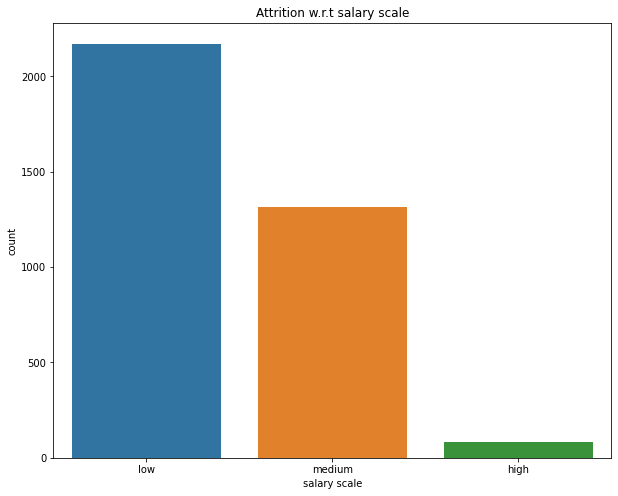

In [11]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=dataset[(dataset['left'] == 1)], x='salary scale').set_title('Attrition w.r.t salary scale');

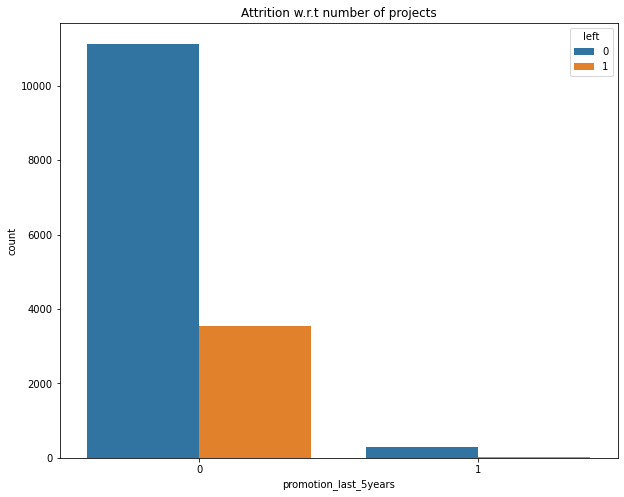

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset, x='promotion_last_5years', hue='left').set_title('Attrition w.r.t number of projects');

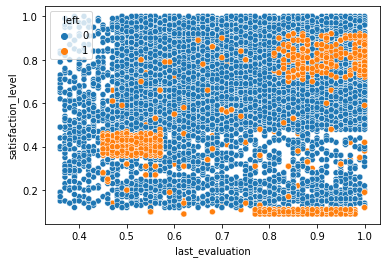

In [13]:
sns.scatterplot(data=dataset, x="last_evaluation", y="satisfaction_level", hue="left")

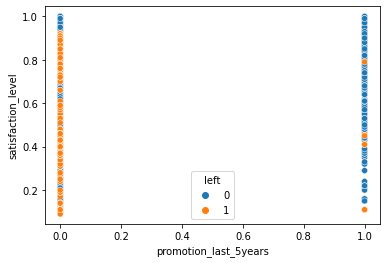

In [14]:
sns.scatterplot(data=dataset, x="promotion_last_5years", y="satisfaction_level", hue="left")

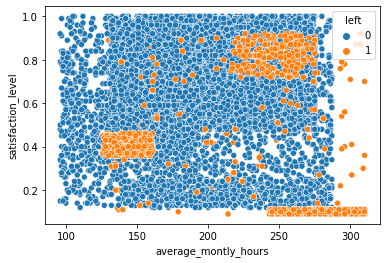

In [15]:
sns.scatterplot(data=dataset, x="average_montly_hours", y="satisfaction_level", hue="left")

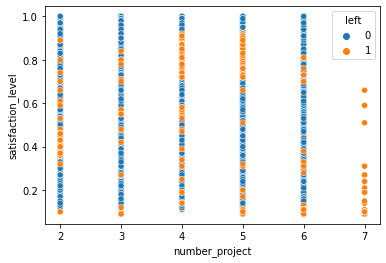

In [16]:
sns.scatterplot(data=dataset, x="number_project", y="satisfaction_level", hue="left")

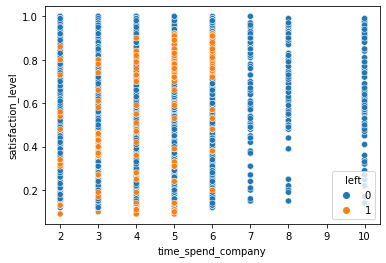

In [17]:
sns.scatterplot(data=dataset, x="time_spend_company", y="satisfaction_level", hue="left")

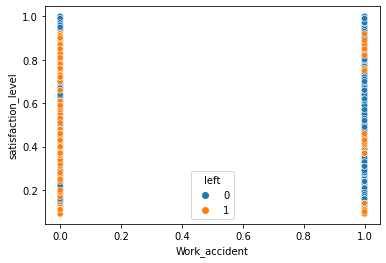

In [18]:
sns.scatterplot(data=dataset, x="Work_accident", y="satisfaction_level", hue="left")

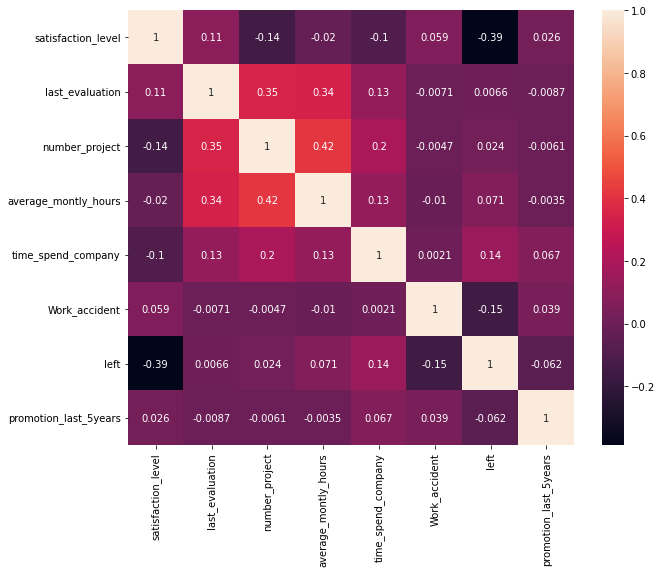

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)

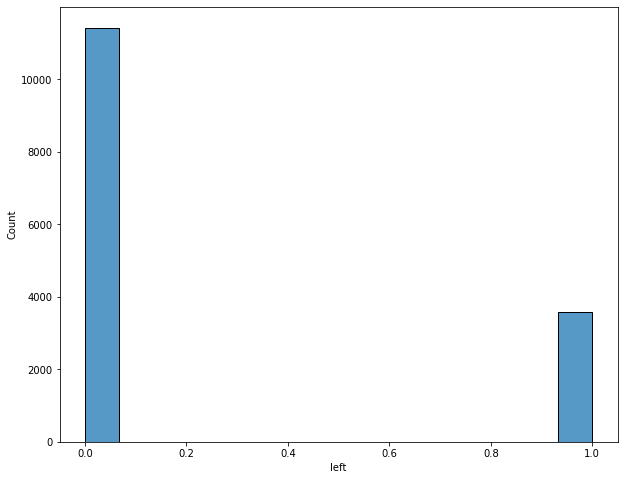

In [20]:
plt.figure(figsize=(10,8))
ax = sns.histplot(x = dataset["left"]);

In [21]:
X = dataset.drop(['left'], axis=1)

In [22]:
features = X.columns

In [23]:
y = dataset.left

In [24]:
X['department'] = LabelEncoder().fit_transform(X['department'])
X['salary scale'] = LabelEncoder().fit_transform(X['salary scale'])

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 32, stratify=y)

In [27]:
X_train.shape

(11999, 9)

In [28]:
from keras import backend as K

def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [29]:
model = Sequential()
model.add(Dense(500, input_dim=9, activation='elu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', recall_score,precision_score, f1_score])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

Epoch 1/50
375/375 [==============================] - 5s 7ms/step - loss: 0.4277 - accuracy: 0.7863 - recall_score: 0.3714 - precision_score: 0.5792 - f1_score: 0.4289 - val_loss: 0.3453 - val_accuracy: 0.8007 - val_recall_score: 0.3563 - val_precision_score: 0.6442 - val_f1_score: 0.4396
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2600 - accuracy: 0.9020 - recall_score: 0.7268 - precision_score: 0.8365 - f1_score: 0.7604 - val_loss: 0.2210 - val_accuracy: 0.9317 - val_recall_score: 0.8664 - val_precision_score: 0.8491 - val_f1_score: 0.8453
Epoch 3/50
375/375 [==============================] - 3s 7ms/step - loss: 0.2066 - accuracy: 0.9320 - recall_score: 0.8521 - precision_score: 0.8594 - f1_score: 0.8449 - val_loss: 0.2015 - val_accuracy: 0.9447 - val_recall_score: 0.8813 - val_precision_score: 0.8857 - val_f1_score: 0.8728
Epoch 4/50
375/375 [==============================] - 3s 7ms/step - loss: 0.1901 - accuracy: 0.9413 - recall_score: 0.8746 - preci

In [30]:
loss_train, accuracy_train,recall_train, precision_train, f1_score_train = model.evaluate(X_train, y_train, verbose=1)

375/375 [==============================] - 1s 2ms/step - loss: 0.1396 - accuracy: 0.9552 - recall_score: 0.9148 - precision_score: 0.9000 - f1_score: 0.9015


In [31]:
loss_test, accuracy_test, recall_test, precision_test, f1_score_test = model.evaluate(X_test, y_test, verbose=1)

94/94 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9517 - recall_score: 0.9091 - precision_score: 0.8813 - f1_score: 0.8885


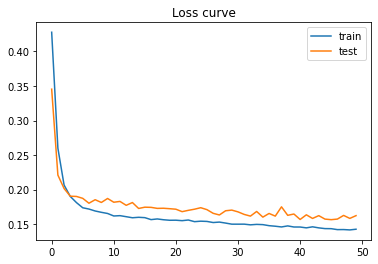

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss curve')
plt.show()

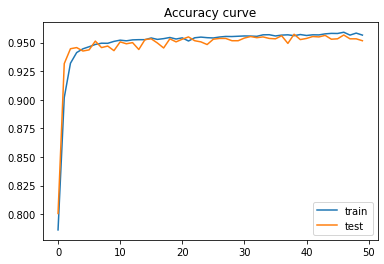

In [33]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy curve')
plt.show()

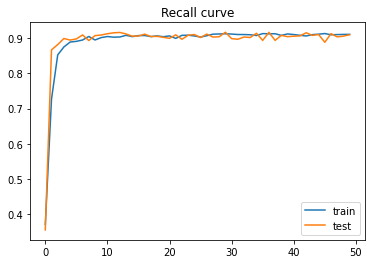

In [34]:
plt.plot(history.history['recall_score'], label='train')
plt.plot(history.history['val_recall_score'], label='test')
plt.legend()
plt.title('Recall curve')
plt.show()

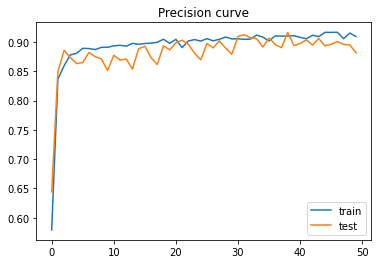

In [35]:
plt.plot(history.history['precision_score'], label='train')
plt.plot(history.history['val_precision_score'], label='test')
plt.legend()
plt.title('Precision curve')
plt.show()

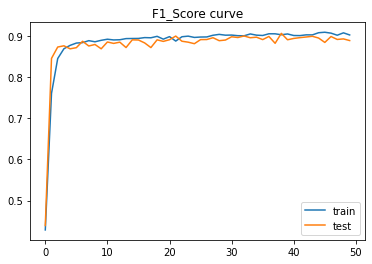

In [36]:
plt.plot(history.history['f1_score'], label='train')
plt.plot(history.history['val_f1_score'], label='test')
plt.legend()
plt.title('F1_Score curve')
plt.show()

In [37]:
def predict_prob(instance):
    y_pred=model.predict(instance).reshape(-1, 1)
    y_pred =(y_pred>0.5)
    return np.hstack((1-y_pred,y_pred))

In [38]:
import lime
from lime import lime_tabular

explainer =lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=features,
    mode='classification'
)

In [39]:
i=4
exp = explainer.explain_instance(
    data_row=X_test[i], 
    predict_fn=predict_prob)

exp.show_in_notebook(show_table=True)

In [40]:
i=50
exp = explainer.explain_instance(
    data_row=X_test[i], 
    predict_fn=predict_prob)

exp.show_in_notebook(show_table=True)

In [41]:
i=100
exp = explainer.explain_instance(
    data_row=X_test[i], 
    predict_fn=predict_prob)

exp.show_in_notebook(show_table=True)